#Data Science Lifecycle
© 2024, Zaka AI, Inc. All Rights Reserved.

---
##Case Study: Loan Status
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models. We will need from it the following functions: LabelEncoder, train_test_split, LogisticRegression, and accuracy_score

In [ ]:
#Test Your Zaka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Combine the two dataset in order to apply the same preprocessing steps in both dataframes
Don't forget to print the head of your dataset to get a better insight into it.

In [ ]:
#Test Your Zaka
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df = pd.concat([train_df, test_df], ignore_index=True)

# 3. Exploratory Data Analysis


Start by getting the number of rows and the number of columns that you have in your dataset

In [ ]:
#Test Your Zaka
rows = df.shape[0]
columns = df.shape[1]
print('There are {} rows and {} columns.'.format(rows,columns))

There are 614 rows and 13 columns.


##### Use the function info(), to check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [ ]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Where did you find some missing values?     

**[Share your Zaka here]**



##### Use the function describe(), to check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [ ]:
#Test Your Zaka
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Print the unique values of the variable Credit_History

In [ ]:
#Test Your Zaka
df['Credit_History'].unique()

array([ 1.,  0., nan])

Do the same with the variable Loan_Amount_Term

In [ ]:
#Test Your Zaka
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

##### Use the function describe(include='o'), to check the following  values for each categorical feature:
* count
* unique
* top
* freq


In [ ]:
#Test Your Zaka
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Interpret the results you obtained for the variable Gender

**[Share your Zaka here]**


**Count:** There are 601 non-missing values. 13 missing values for Gender in the dataset of 614 rows

**unique:** There are two unique genders "Male" and "Female"

**top:** Most frequent is male.

**freq:** 489 are Male

Compute the frequency for each unique value in the categorical feature specified in the code cells below

In [ ]:
#Test Your Zaka
#Property_Area
property_area_freq = df['Property_Area'].value_counts()
print(property_area_freq)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [ ]:
#Test Your Zaka
#Dependents
dependents = df['Dependents'].value_counts()
print(dependents)

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Create a new dataframe removeNA_df, where you remove the nulls existing in the original dataframe. This is only for being able to visualize distributions. In a later step, we will be focusing on cleaning our original dataset in a better way

In [ ]:
#Test Your Zaka
removeNA_df = df.dropna()

Plot the distribution and the boxplot for the variable 'LoanAmount'

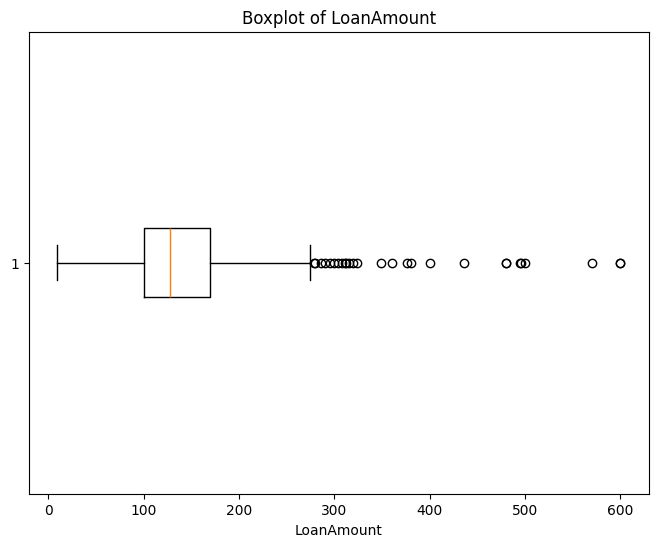

In [ ]:
#Test Your Zaka
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(removeNA_df['LoanAmount'], vert=False)  # vert=False for horizontal boxplot
plt.title('Boxplot of LoanAmount')
plt.xlabel('LoanAmount')
plt.show()

* Is there any outlier?
* Is the data skewed?

**[Share your Zaka here]**

Yes, there are outliers & the data is skewed

Do the same for the variable 'ApplicantIncome'

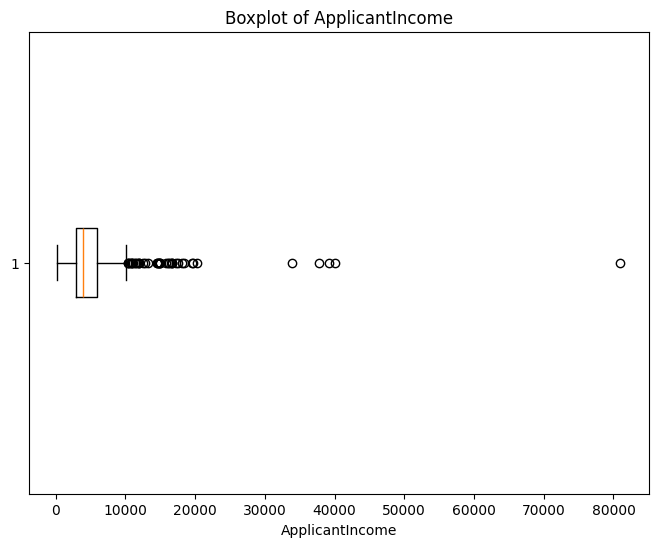

In [ ]:
#Test Your Zaka
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(removeNA_df['ApplicantIncome'], vert=False)  # vert=False for horizontal boxplot
plt.title('Boxplot of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.show()

* Is there any outlier?
* Is the data skewed?

**[Share your Zaka here]**
Yes, the data is skewed and there are outliers

Do the same for 'CoapplicantIncome'

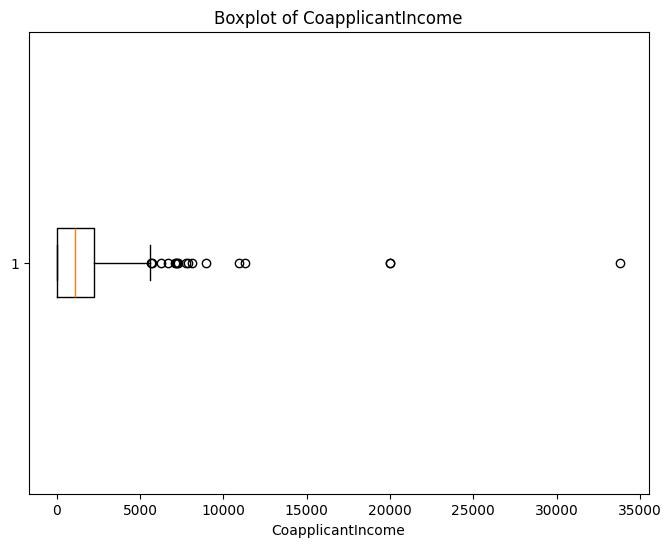

In [ ]:
#Test Your Zaka
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(removeNA_df['CoapplicantIncome'], vert=False)  # vert=False for horizontal boxplot
plt.title('Boxplot of CoapplicantIncome')
plt.xlabel('CoapplicantIncome')
plt.show()

**[Share your Zaka here]**

Do the same for 'Loan_Amount_Term'

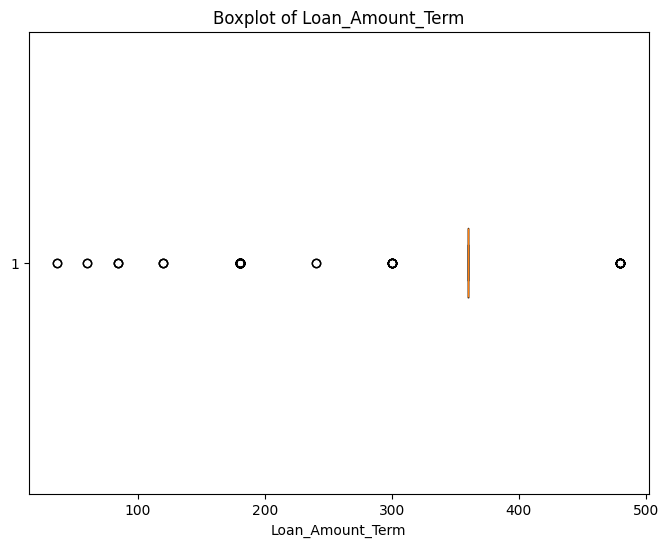

In [ ]:
#Test Your Zaka
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(removeNA_df['Loan_Amount_Term'], vert=False)  # vert=False for horizontal boxplot
plt.title('Boxplot of Loan_Amount_Term')
plt.xlabel('Loan_Amount_Term')
plt.show()

What do you think about outliers in this case?

**[Share your Zaka here]**

Plot the value_counts for 'Loan_Amount_term'

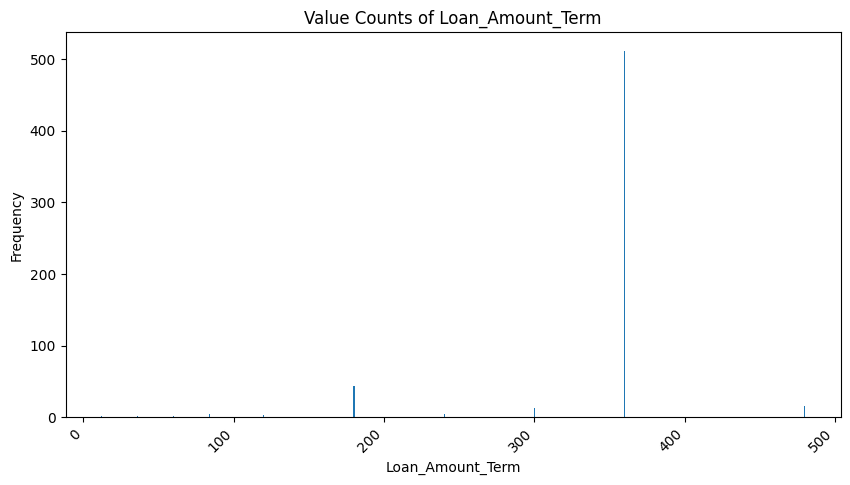

In [ ]:
#Test Your Zaka
loan_amount_term_counts = df['Loan_Amount_Term'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 5))
plt.bar(loan_amount_term_counts.index, loan_amount_term_counts.values)
plt.title('Value Counts of Loan_Amount_Term')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


Do the same for the categorical variables you have ('Dependants', 'Education', etc), using a subplot of size 4 by 2

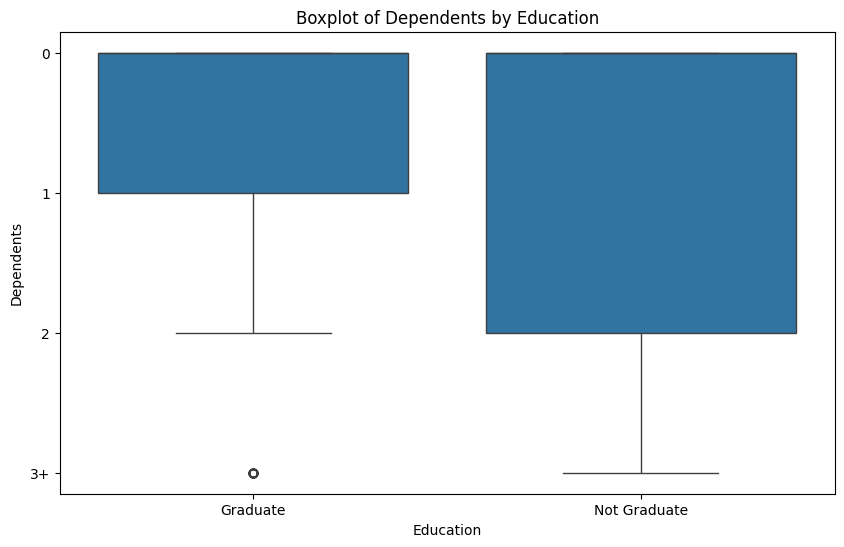

In [ ]:
#Test Your Zaka


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='Dependents')
plt.title('Boxplot of Dependents by Education')
plt.xlabel('Education')
plt.ylabel('Dependents')
plt.show()

Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders

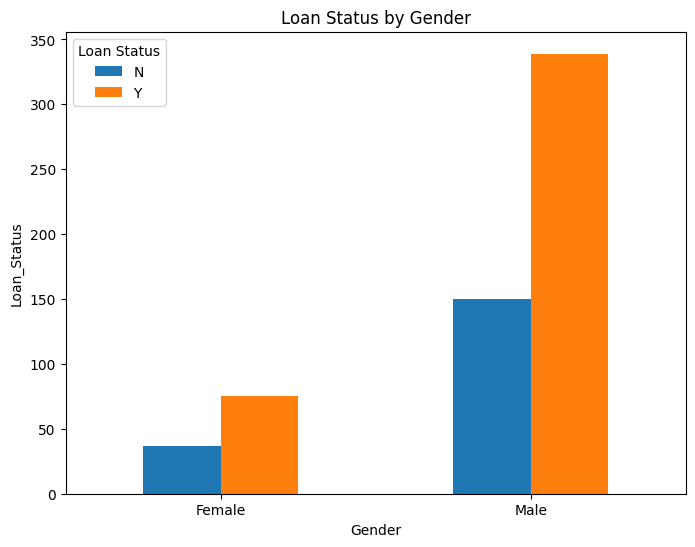

In [ ]:
# Perform cross-tabulation
cross_tab = pd.crosstab(df['Gender'], df['Loan_Status'])

# Create bar plot
cross_tab.plot(kind='bar', stacked=False, figsize=(8, 6))  # Adjust figure size if needed
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan_Status')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Loan Status')
plt.show()

Does the Gender affect the acceptance of the Loan?

**[Share your Zaka here]**

No, it doesnt

Do the same with Credit_history and Loan_Status

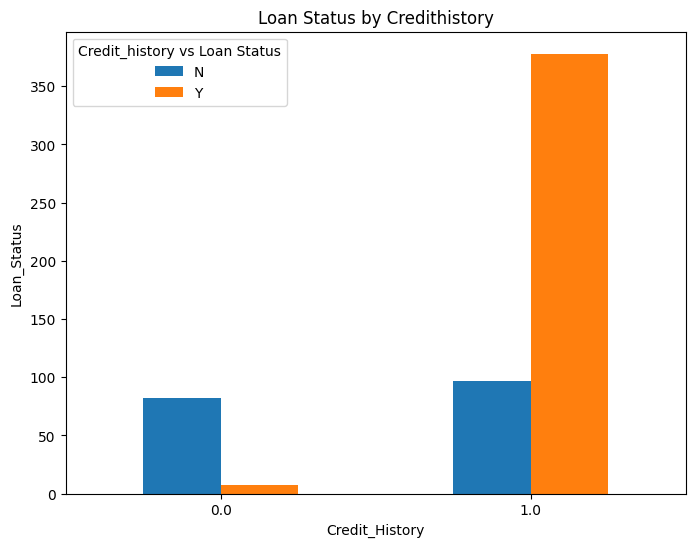

In [ ]:
#Test Your Zaka
# Perform cross-tabulation
cross_tab = pd.crosstab(df['Credit_History'], df['Loan_Status'])

# Create bar plot
cross_tab.plot(kind='bar', stacked=False, figsize=(8, 6))  # Adjust figure size if needed
plt.title('Loan Status by Credithistory')
plt.xlabel('Credit_History')
plt.ylabel('Loan_Status')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Credit_history vs Loan Status')
plt.show()

Does the Credit History affect the acceptance of the Loan?

**[Share your Zaka here]**

Yes, it does



Do the same with Dependents and Loan_Status

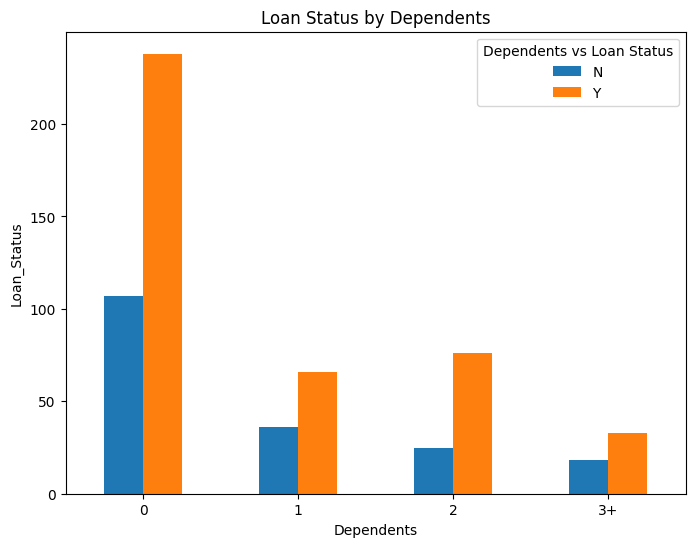

In [ ]:
#Test Your Zaka
cross_tab = pd.crosstab(df['Dependents'], df['Loan_Status'])

# Create bar plot
cross_tab.plot(kind='bar', stacked=False, figsize=(8, 6))  # Adjust figure size if needed
plt.title('Loan Status by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Loan_Status')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Dependents vs Loan Status')
plt.show()

Does the number of dependents affect the acceptance of the Loan?

**[Share your Zaka here]**

Yes, it does



Do the same between Education and Loan_Status

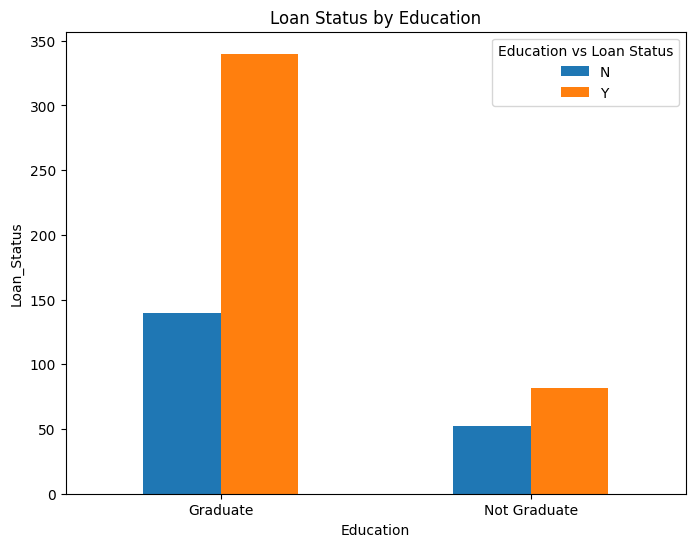

In [ ]:
#Test Your Zaka
cross_tab = pd.crosstab(df['Education'], df['Loan_Status'])

# Create bar plot
cross_tab.plot(kind='bar', stacked=False, figsize=(8, 6))  # Adjust figure size if needed
plt.title('Loan Status by Education')
plt.xlabel('Education')
plt.ylabel('Loan_Status')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Education vs Loan Status')
plt.show()

Does the level of education affect the acceptance of the Loan?

**[Share your Zaka here]**

Yes, it does

Do the same between Married and Loan_Status

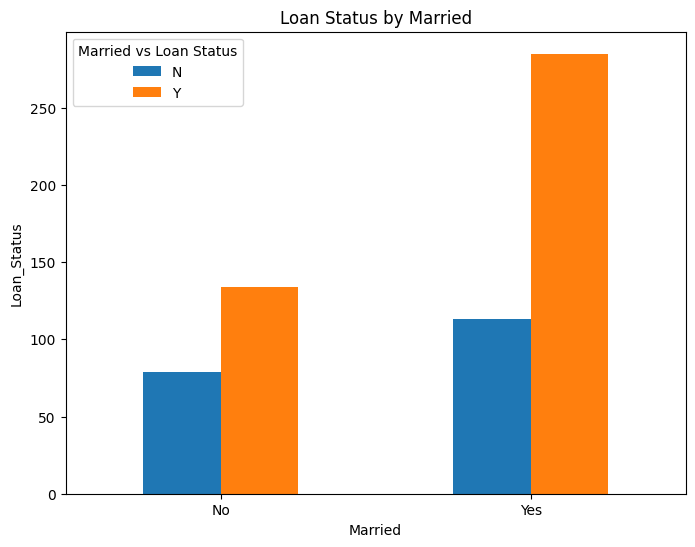

In [ ]:
#Test Your Zaka
cross_tab = pd.crosstab(df['Married'], df['Loan_Status'])

# Create bar plot
cross_tab.plot(kind='bar', stacked=False, figsize=(8, 6))  # Adjust figure size if needed
plt.title('Loan Status by Married')
plt.xlabel('Married')
plt.ylabel('Loan_Status')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Married vs Loan Status')
plt.show()

Does the marriage affect the acceptance of the Loan?

**[Share your Zaka here]**

Yes, it does

Do the same between Property_Area and Loan_Status

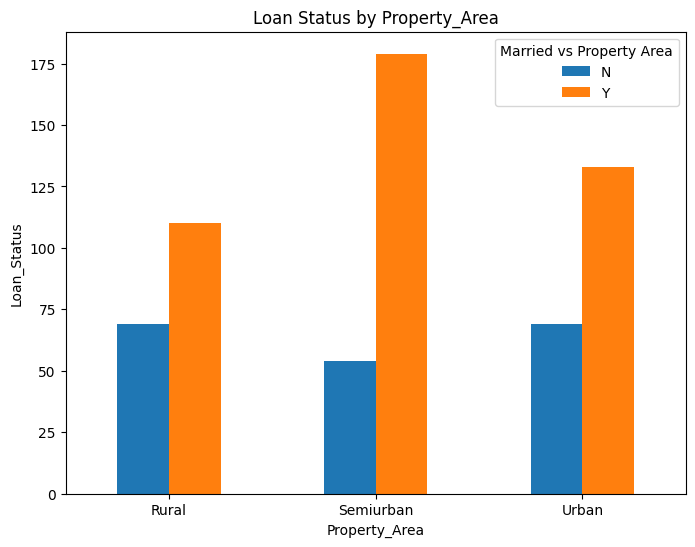

In [ ]:
#Test Your Zaka
cross_tab = pd.crosstab(df['Property_Area'], df['Loan_Status'])

# Create bar plot
cross_tab.plot(kind='bar', stacked=False, figsize=(8, 6))  # Adjust figure size if needed
plt.title('Loan Status by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Loan_Status')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Married vs Property Area')
plt.show()

Does the Property Area affect the acceptance of the Loan?

**[Share your Zaka here]**

Yes, it does

Do the same between Self_Employed and Loan_Status

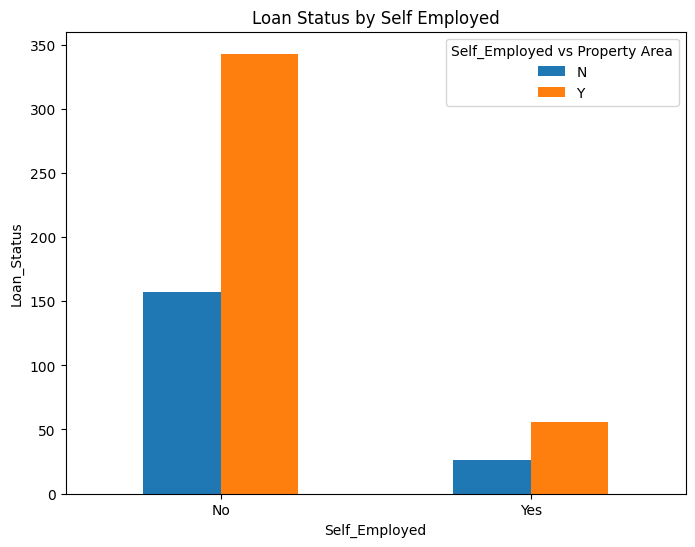

In [ ]:
#Test Your Zaka
cross_tab = pd.crosstab(df['Self_Employed'], df['Loan_Status'])

# Create bar plot
cross_tab.plot(kind='bar', stacked=False, figsize=(8, 6))  # Adjust figure size if needed
plt.title('Loan Status by Self Employed')
plt.xlabel('Self_Employed')
plt.ylabel('Loan_Status')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Self_Employed vs Property Area')
plt.show()

Does the Self Employed Property affect the acceptance of the Loan?

**[Share your Zaka here]**

Plot a Scatter Plot between Loan_Status and:
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* LoanAmount_Term

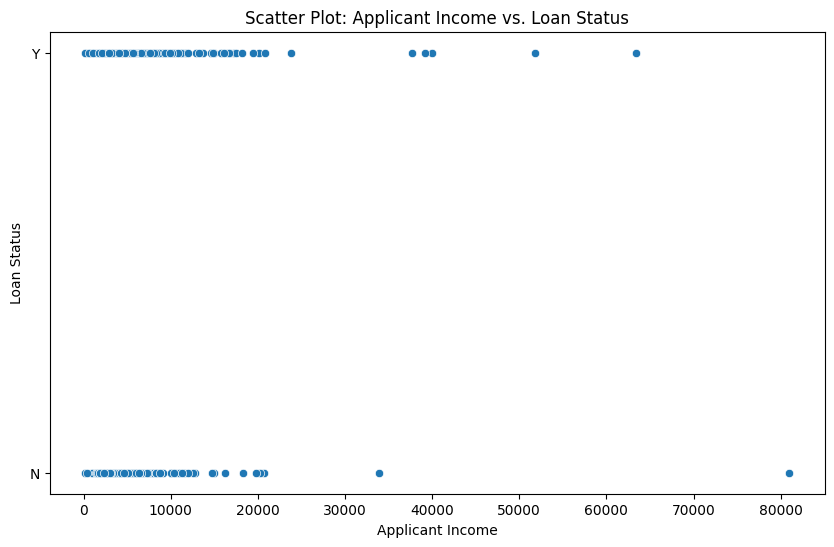

In [ ]:
#Test Your Zaka

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ApplicantIncome', y='Loan_Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Status')
plt.title('Scatter Plot: Applicant Income vs. Loan Status')
plt.show()

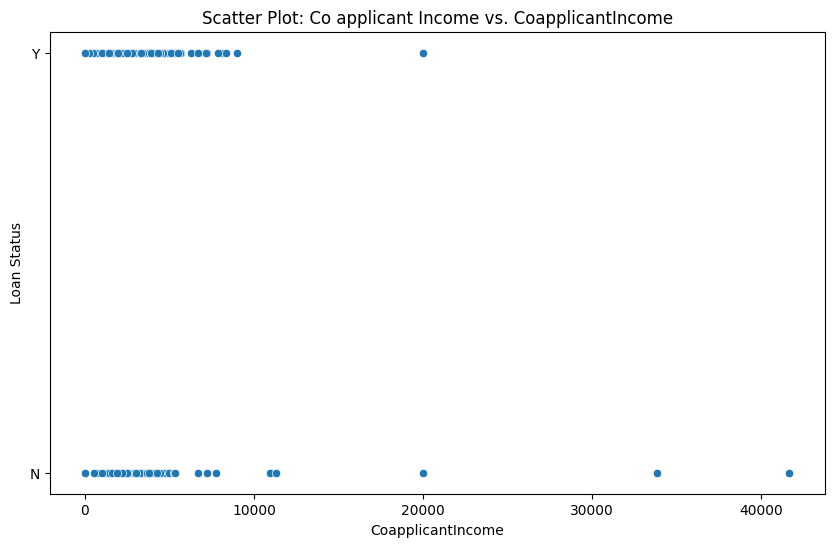

In [ ]:
#Test Your Zaka
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CoapplicantIncome', y='Loan_Status')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Loan Status')
plt.title('Scatter Plot: Co applicant Income vs. CoapplicantIncome')
plt.show()

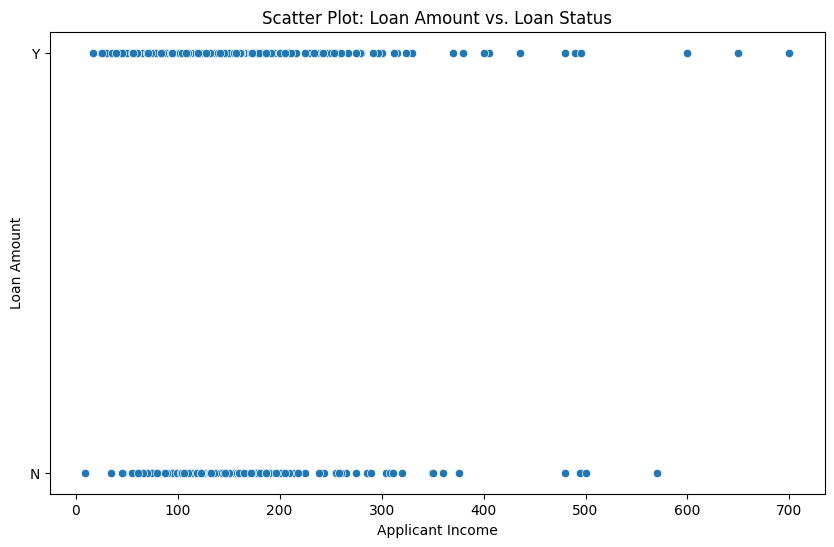

In [ ]:
#Test Your Zaka
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LoanAmount', y='Loan_Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Loan Amount vs. Loan Status')
plt.show()

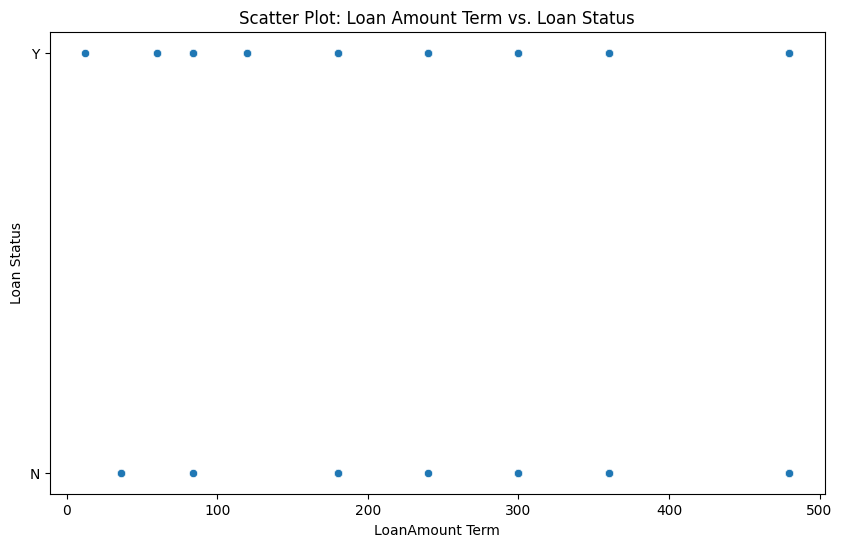

In [ ]:
#Test Your Zaka
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Loan_Amount_Term', y='Loan_Status')
plt.xlabel('LoanAmount Term')
plt.ylabel('Loan Status')
plt.title('Scatter Plot: Loan Amount Term vs. Loan Status')
plt.show()

Do you think these scatter plots gave you valuable information about the Loan_Status?

**[Share your Zaka here]**

Group your dataframe by Loan_Status on the median Value

In [ ]:
#Test Your Zaka
# Group by Loan_Status and calculate median for numeric columns only
loan_status_median = df.groupby('Loan_Status').median(numeric_only=True)

# Display the result
print(loan_status_median)

             ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                     3833.5              268.0       129.0             360.0   
Y                     3812.5             1239.5       126.0             360.0   

             Credit_History  
Loan_Status                  
N                       1.0  
Y                       1.0  


What did you deduce?

**[Share your Zaka here]**

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: standarize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

Remove the features that do not contribute to the prediction of the loan status

In [ ]:
#Test Your Zaka
df = df.drop(columns=['Loan_ID'])

## Remove grabage data

If you go back to one of the EDA steps where you saw the unique values of Dependents, you can see that you have '3+' as a value. In order to make the algorithm learn from such information, you have to replace this with a number. We will replace it by 3.

In [ ]:
#Test Your Zaka
df['Dependents'] = df['Dependents'].replace('3+', '3')

##Convert continuous data into categorical

Search for the feature that is contionuous but should be categorical and convert it

In [ ]:
#Test Your Zaka
df['Credit_History'] = df['Credit_History'].astype('category')

## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continuous data with mean


In [ ]:
#Test Your Zaka
# Separate categorical and continuous features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Fill missing values
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True) # Fill with mode
for feature in continuous_features:
    df[feature].fillna(df[feature].mean(), inplace=True)    # Fill with mean

<ipython-input-58-704d67ae7281>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mode()[0], inplace=True) # Fill with mode
<ipython-input-58-704d67ae7281>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

## Check if any null value exist

In [ ]:
#Test Your Zaka
df.isnull().values.any()

False

## Encode categorical data

Go over your categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [ ]:
#Test Your Zaka

# List of categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical features
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)
First compute the maximum of each feature, and then divide each column by its maximum. After it, describe the data

In [ ]:
#Test Your Zaka
# List of numerical features to normalize
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Normalize numerical features
for feature in numerical_features:
    df[feature] = df[feature] / df[feature].max()

# Describe the normalized data
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,0.066709,0.038910,0.209160,0.713355,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,0.075420,0.070229,0.120054,0.134226,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001852,0.000000,0.012857,0.025000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.035525,0.000000,0.143214,0.750000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.047068,0.028524,0.184286,0.750000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.071543,0.055134,0.235357,0.750000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


# 6. Training & Validating

Create a variable x for the inputs (Fetaures), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%).

In [ ]:
#Test Your Zaka
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df['Loan_Status']              # Target ('Loan_Status')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% testing

##Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [ ]:
#Test Your Zaka
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

##Validating the model

Validate your model on the testing data, and compute the accuracy score of your predictions

In [ ]:
#Test Your Zaka
from sklearn.metrics import accuracy_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(accuracy)

0.7837837837837838


#7. Feature Importance

Evaluate the feature importance in your resulting model, and plot it

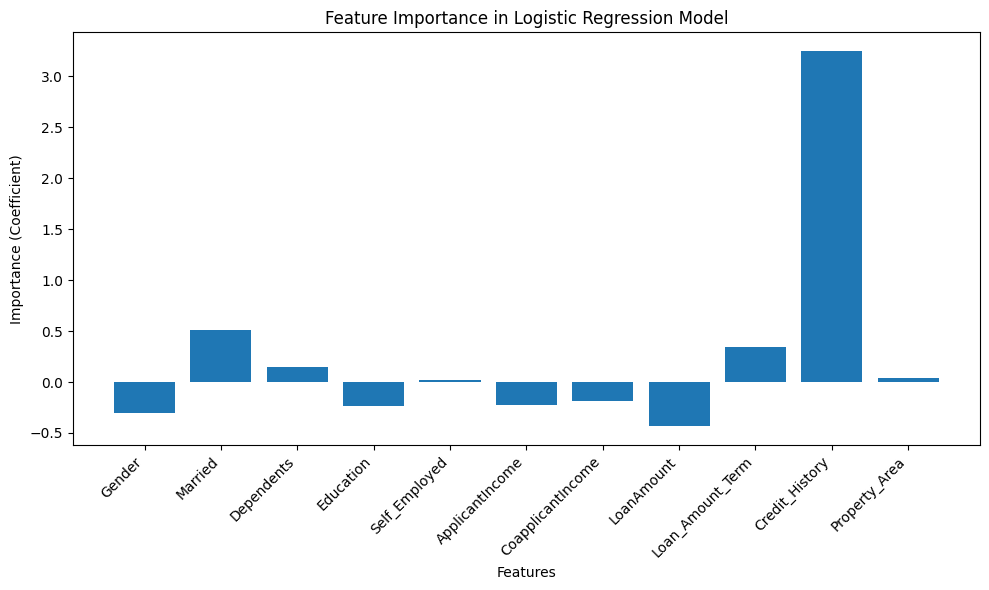

In [ ]:
#Test Your Zaka
importance = model.coef_[0]

# Create a bar plot of feature importance
feature_names = X_train.columns  # Get feature names
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importance)
plt.title("Feature Importance in Logistic Regression Model")
plt.xlabel("Features")
plt.ylabel("Importance (Coefficient)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

What's the most important feature?

**[Share your Zaka here]**